<a href="https://colab.research.google.com/github/JosephJonathanFernandes/Sem7-AI-ML-Honours-Lab-Codes/blob/main/NNDL_expt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training AND Gate


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AND Gate Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predictions:
[[0]
 [0]
 [0]
 [0]]
Expected:
[[0]
 [0]
 [0]
 [1]]

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


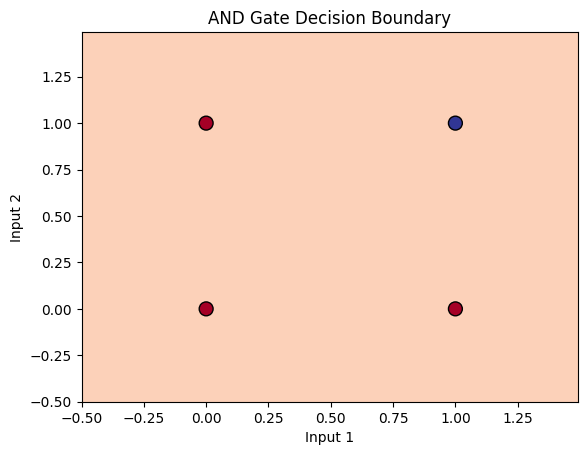


Training OR Gate
OR Gate Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predictions:
[[1]
 [1]
 [1]
 [1]]
Expected:
[[0]
 [1]
 [1]
 [1]]

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


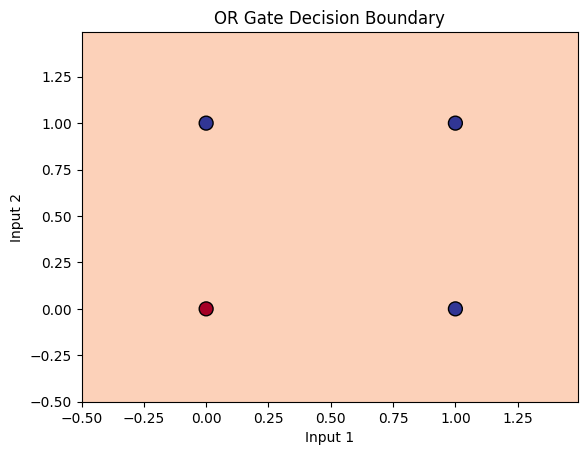


Training NOT Gate
NOT Gate Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Inputs:
[[0]
 [1]]
Predictions:
[[1]
 [0]]
Expected:
[[1]
 [0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


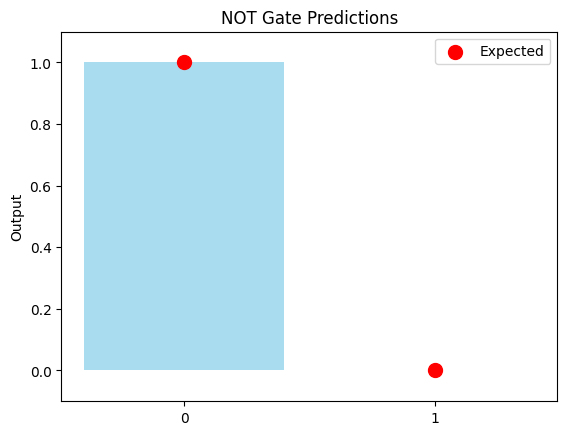


Training XOR Gate
XOR Gate Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predictions:
[[1]
 [1]
 [1]
 [0]]
Expected:
[[0]
 [1]
 [1]
 [0]]

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


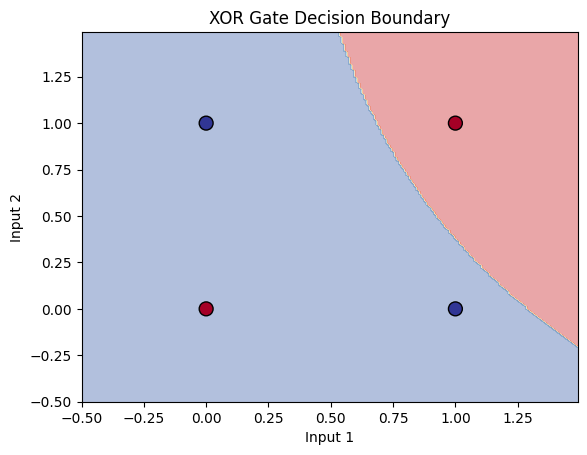

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to build, train, and return a simple ANN for a logic gate
def train_gate(X, y, gate_name):
    print(f"\nTraining {gate_name} Gate")

    # Define the model
    model = Sequential()
    model.add(Dense(4, input_dim=X.shape[1], activation='sigmoid'))  # hidden layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X, y, epochs=500, verbose=0)

    # Evaluate
    _, accuracy = model.evaluate(X, y, verbose=0)
    print(f"{gate_name} Gate Accuracy: {accuracy*100:.2f}%")

    # Predictions
    predictions = (model.predict(X) > 0.5).astype("int32")
    print(f"Inputs:\n{X}\nPredictions:\n{predictions}\nExpected:\n{y}\n")

    return model

# Function to visualize 2-input logic gates or single-input NOT gate
def plot_gate(X, y, model, gate_name):
    if X.shape[1] == 2:  # Only 2-input gates
        # Create a grid of points
        x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
        y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict on grid
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z = (model.predict(grid_points) > 0.5).astype(int)
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
        plt.scatter(X[:,0], X[:,1], c=y[:,0], s=100, edgecolors='k', cmap=plt.cm.RdYlBu)
        plt.title(f"{gate_name} Gate Decision Boundary")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.show()
    else:  # Single input gates like NOT
        predictions = (model.predict(X) > 0.5).astype(int)
        plt.bar([0,1], predictions[:,0], color='skyblue', alpha=0.7)
        plt.scatter([0,1], y[:,0], color='red', s=100, label='Expected')
        plt.xticks([0,1])
        plt.ylim(-0.1,1.1)
        plt.title(f"{gate_name} Gate Predictions")
        plt.ylabel("Output")
        plt.legend()
        plt.show()


# ------------------- TRAIN AND VISUALIZE ALL LOGIC GATES -------------------

# AND gate
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([[0],[0],[0],[1]])
model_and = train_gate(X_and, y_and, "AND")
plot_gate(X_and, y_and, model_and, "AND")

# OR gate
X_or = np.array([[0,0],[0,1],[1,0],[1,1]])
y_or = np.array([[0],[1],[1],[1]])
model_or = train_gate(X_or, y_or, "OR")
plot_gate(X_or, y_or, model_or, "OR")

# NOT gate (single input)
X_not = np.array([[0],[1]])
y_not = np.array([[1],[0]])
model_not = train_gate(X_not, y_not, "NOT")
plot_gate(X_not, y_not, model_not, "NOT")

# XOR gate (needs hidden layer to learn)
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([[0],[1],[1],[0]])
model_xor = train_gate(X_xor, y_xor, "XOR")
plot_gate(X_xor, y_xor, model_xor, "XOR")
